# Breaking Probability

### Background
Suppose you know that the outcomes of the last 5 fair coin flips are all TAILS. You are asked to place a bet on the outcome of the 6th flip - with $1 million on the line. Should you bet on HEADS? TAILS? Does it matter, or is this pure chance?

Convention teaches that a coin flip is an independent event. That is to say, prior outcomes do not influence future outcomes. Another way to look at it is the coin does not know it's previous results. It simply lands at random, if you will. But is this really the case?

To find out, let us run a Monte Carlo simulation and analyze the results. 

For those unfamiliar, a Monte Carlo simulation is a technique where computers are used to simulate probability via large numbers of repetitions. 

### Imports

time, random, and matplotlib will be used for this proof. Explanations for each are in the form of code comments.

In [7]:
# to report execution time
import time
start_time = time.time()

# allow for randomization - simulate coin flip
import random

# plotting
import matplotlib.pyplot as plt

### Run Monte Carlo Simulation

Notice we simulate 1,000,000 coin flips.

This should be more than enough to get accurate probabilities, but we can check.

In [8]:
# array to store flip results
flip_results = []

# simulate 1,000,000 coin flips and record results
# 0 represents "HEADS"
# 1 represents "TAILS"
for i in range(1000000):
    flip_results.append(random.randint(0,1))

### Plot Running Probability

Let's see how our probability evolves with each repetition, as well as the final result. 

Expected output: 

$P(HEAD$ or $TAIL)$ = $\frac{1}{2^1}$ = $\frac{1}{2}$ = $0.50$ or $50$%

Note: no seed value is specified, thus your results will vary. However, the value should always be $0.50 +/- 0.05$.

P(heads) or P(tails) =  0.499285


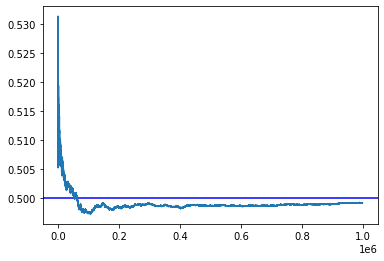

In [9]:
def p_over_time(flips):
    p_progression = []
    running_total = 0
    
    for flip in range(len(flips)):
        running_total += flips[flip]
        p_progression.append(running_total / (flip + 1))

    for num in range(1000):
      p_progression.pop(0)

    plt.axhline(y = 0.5, color = 'b')
    plt.plot(p_progression)

p_over_time(flip_results)
print("P(heads) or P(tails) = ",(sum(flip_results) / len(flip_results)))

### Running Probability Analysis

The returned value is as we expected, around 0.5. Therefore we can conclude our Monte Carlo simulation has done its job. 

But why?

Monte Carlo simulations take advantage of the Law of Large Numbers, which states that the more simulations you run, the more accurate of a probability you will obtain. 

Notice the first 1,000 running probability values are not plotted. This is because the variation is initially too extreme to render an informative graph. However, the more coins that are virtually flipped, the more accurate the probability estimate becomes.  

### Traditional Probability Test

Let's approach our question from a traditional probability perspective.

Looking at each value, it is expected that the probability of the next coin flip should be 0.5, regardless of the previous result. Let's see if this holds.

The following code calculates the following:

Given any flip $n$ out of the 1,000,000 flips, what is the probability that flip $n + 1$ is the same? That is, $n = n + 1$?

In [10]:
def subsequent_flip(flips):
  flip = flips[0]
  length = len(flips)
  is_same = 0

  for i in range(1, length):
    if flip == flips[i]:
      is_same += 1
      flip = flips[i]

  return is_same

print("P(SAME AS PRIOR) = ", subsequent_flip(flip_results) / len(flip_results))

P(SAME AS PRIOR) =  0.499284


The value is around 0.5, which appears to mean that the coin flips are truly random and prior results have no impact.

BUT... is this the whole story?

### Probability of Exactly 2 of the Same in a Row

Now we will calculate the probability of obtaining exactly two HEADS (or exactly two TAILS) in a row. 

The expected result is:

$P$ = $\frac{1}{2^2}$ = $\frac{1}{4}$ = $0.25$ or $25$%

In [11]:
# getting exactly two heads or two tails in a row
def two_of_a_kind(flips):

    two = 0

    for i in range(1, len(flips) - 1):
        if flips[i] == flips[i + 1]:
            if (i + 2) < len(flips) and flips[i] != flips[i + 2]:
                two += 1
                i += 2
            else:
                j = i + 3
                while j < len(flips) and flips[j] == flips[j - 1] :
                    j += 1
                i = j
    
    return two

print("P(exactly 2 heads or exactly 2 tails) = ", (two_of_a_kind(flip_results) / len(flip_results)))

P(exactly 2 heads or exactly 2 tails) =  0.249979


The probability holds; the value is around $0.25$%.

# Probability of N Concurrent Flips


### Generalization
Now let's generalize and count the number of times each N concurrent flips occurs. 

Some sample expected results: 

$P$ (3 in a row) = $\frac{1}{2^3}$ = $\frac{1}{8}$ = $0.125$ or $12.5$%

$P$ (4 in a row) = $\frac{1}{2^4}$ = $\frac{1}{16}$ = $0.0625$ or $6.25$%

$P$ (5 in a row) = $\frac{1}{2^5}$ = $\frac{1}{32}$ = $0.03125$ or $3.125$%

Flip Series Length	 Probability
1 						 0.5008577733840608
2 						 0.2497248934024345
3 						 0.12492535673986199
4 						 0.06224698680886333
5 						 0.03120537631187402
6 						 0.01559170386347523
7 						 0.007706979020001398
8 						 0.003846499505706839
9 						 0.0019392269055250992
10 						 0.0010345206354912474
11 						 0.0004893003005701846
12 						 0.0002296715696553928
13 						 9.186862786215712e-05
14 						 5.9914322518798116e-05
15 						 2.3965729007519246e-05
16 						 1.1982864503759623e-05
17 						 5.9914322518798116e-06
18 						 3.994288167919874e-06
19 						 3.994288167919874e-06
20 						 0.0


Now let's plot the first 10 values...



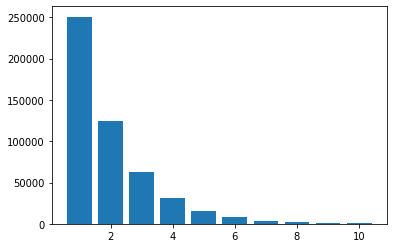

In [17]:
# counting occurences

# dictionary to store counts of each length
dict_counts = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0, 13:0, 14:0, 15:0, 16:0, 17:0, 18:0, 19:0, 20:0}

# function to convert element at list index to string and append
def concurrence_counter(flips):
  # keep track of current string's length
  string_length = 1

  current_val = flips[0]

  for i in range(1, len(flips)):
    if current_val == flips[i]:
      string_length += 1
    else:
      dict_counts[string_length] += 1  
      string_length = 1
  
  print("Flip Series Length\t Probability")

  sum_occurences = 0
  sum_probability = 0
  counts = []
  lengths = list(range(1,21))

  for val in dict_counts:
    sum_occurences += dict_counts[val]
    sum_probability += (dict_counts[val]/sum_occurences)
    counts.append(dict_counts[val])

  for val in dict_counts:
    print(val, "\t\t\t\t\t\t", dict_counts[val]/sum_occurences)

  print("\n\nNow let's plot the first 10 values...\n")

  plt.bar(lengths[:10], counts[:10])
  plt.show()

concurrence_counter(flip_results)


    


Let's simulate gambling... 

Player will start with $100. 

Each bet will be of amount $10, and player will bet every round. 

Bet will be randomly chosen between 0 and 1 (red or black).

To make this more realistic, we will include a third option. 2 will be used to denote the green 0 and 00. Player will not bet on these pockets, but the randomization will include them.

In [13]:
# let's simulate gambling where a person has no strategy and bets at random with the same amount each time
# we will assume 100 different people are playing the results (randomized 100 times)

def gamble_simple():
  
  bet_amount = 10

  for i in range(1000):
    won = 0
    lost = 0
    #max_streak_lose = 0
    #max_streak_win = 0

    final_balance = []

    pockets = [0,1,2]
    outcomes = []
    bets = []

    for pocket in range(100):
      land = random.choices(pockets, weights = [18,18,2])
      land_int = land[0]
      outcomes.append(land_int)
    
    for bet in range(100):
      choice = random.randint(0,1)
      bets.append(choice)

    for round in range(len(bets)):
      if outcomes[round] == bets[round]:
        lost += 10
        won += 20
      else: 
        lost +=10
      
    #print("Balance: $", (won-lost), sep = '')

    final_balance.append(won-lost)

  print("Average loss: $", sum(final_balance)/len(final_balance), sep = '')


gamble_simple()

Average loss: $0.0


Now let's see if betting only after 3 of a kind in a row will change the outcomes. 

This time, we will not bet randomly. Given that we have obtained 3 of a kind, we will bet the opposite.

Example: Suppose we notice 3 0's in a row. We will then bet 1, under the assumption that the probability of obtaining another 0 is now different. 


In [14]:
def gamble_3():
  
  bet_amount = 10

  for i in range(1000):
    won = 0
    lost = 0
    #max_streak_lose = 0
    #max_streak_win = 0

    final_balance = []

    pockets = [0,1,2]
    outcomes = []

    for pocket in range(100):
      land = random.choices(pockets, weights = [18,18,2])
      land_int = land[0]
      outcomes.append(land_int)

    for round in range(97):
        if outcomes[round] == outcomes[round + 1] and outcomes[round] == outcomes[round + 2]:
          if outcomes[round] == 0:
            bet = 1
          else:
            bet = 0
          
          if bet == outcomes[round + 3]:
            won += 20
            lost += 10

          else: 
            lost += 10

          round += 3


      
      
    #print("Balance: $", (won-lost), sep = '')

    final_balance.append(won-lost)

  print("Average loss: $", sum(final_balance)/len(final_balance), sep = '')


gamble_3()

Average loss: $50.0


The outcomes have virtually remained the same, we have not succeeded in increasing our win odds.

So, mathematically, why doesn't this work? Let's look at the series notation for this problem. 

The sum of all probabilities equals 1. 

$\sum_{n=1}^∞ \frac{1}{2^n}$ = 1

We can derive an explanation from the sum of series from the following equation. 

$\sum_{n=i}^∞ \frac{1}{2^n}$ = $\frac{1}{2^{i-1}}$

As proof, take i = 2. Then: 

$\sum_{n=2}^∞ \frac{1}{2^n}$ = $\frac{1}{2}$

n = i = 2, so i-1 = 1. 

$\frac{1}{2^1}$ = $\frac{1}{2}$. 

This means that regardless of which n (how many concurrent flips) you pick, you will always have a 50-50 chance on the next one. 

Think of the results as strings of numbers. When you start, you do not know if the next result is part of a string of length 1 or greater. 

There is a 50% chance that the string is of length 1, 25% chance of length 2, 12.5% chance of length 3, and so on. 

We have proved, however, that there is an equal chance of having string length 1 and having a string length >= 2. 

Expanding on this, we can say that there is an equal chance of having string length n and having a string length >= n + 1. 

Therefore, it does not matter how many flips you know have been concurrent. Your next flip will always be 50-50. 
